In [ ]:
import os
for shuffled, _, tamil_characters.zip in os.walk('/kaggle/input'):
    for filename in tamil_characters.zip:
        print(os.path.join(shuffled, tamil_characters.zip))

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras import layers, models
from keras_preprocessing.image import ImageDataGenerator, load_img
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import zipfile
import os
import re

In [ ]:
DATASET_ZIP = 'data/tamil_characters.zip'
IMAGE_SHAPE = (120, 120, 1)

**Data Preparation**

In [ ]:
#Extract the data:

from zipfile import ZipFile
file_name = "/content/tamil_characters.zip"
  
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as z:
  z.extractall('data')
os.rename('data/shuffled', 'data/train')

In [ ]:
TRAIN_PATH = '/content/data/shuffled'
print('Number of images in the dataset: ', len(os.listdir(TRAIN_PATH)))

FileNotFoundError: ignored

**Creating a Dataframe**

In [ ]:
files = os.listdir(TRAIN_PATH)
target = []
for filename in os.listdir(TRAIN_PATH):
  substr = re.search('_(.+?)t', filename)
  if(substr):
    category = substr.group(1)
    target.append(category)

# Create a DataFrame
df = pd.DataFrame({'filename': files,'category': target})

In [ ]:
print('Number of unique characters: {}'.format(df['category'].unique()))
df.head()

Number of unique characters: ['010' '001' '005' '008' '004' '009' '007' '002' '003' '006' '000' '155']


filename category
0  u51_010t01.tiff      010
1  u33_001t03.tiff      001
2  u22_005t10.tiff      005
3  u31_008t02.tiff      008
4  u32_005t10.tiff      005

Mapping the class with the unicode value of that character.

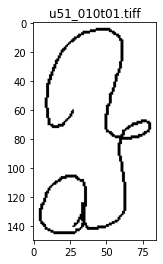

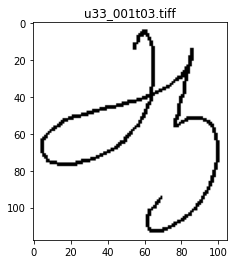

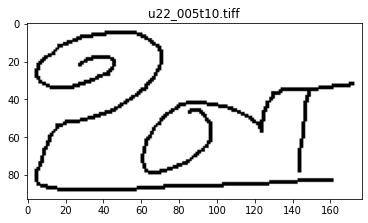

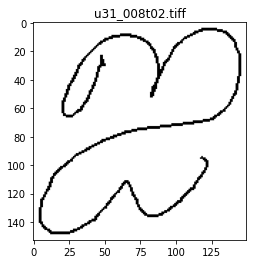

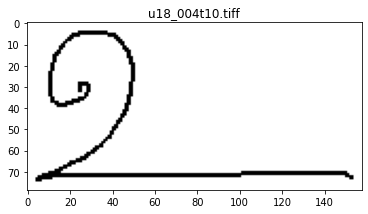

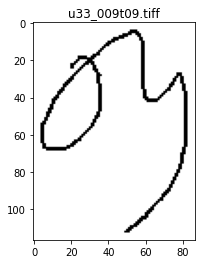

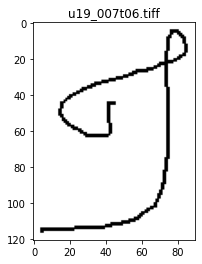

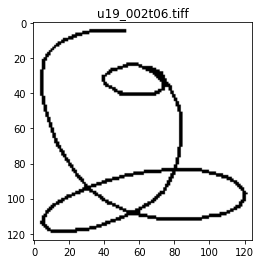

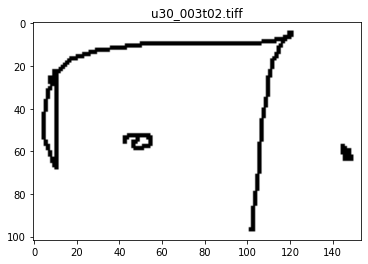

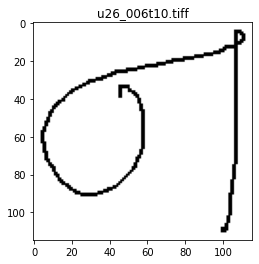

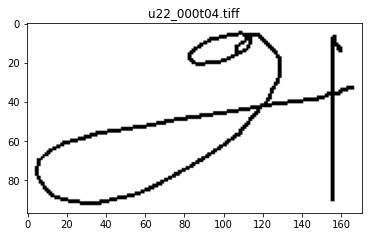

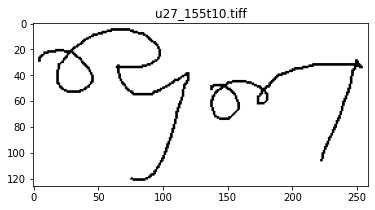

In [ ]:
for each in df['category'].unique():
  filename = df[df['category'] == each]['filename'].iloc[0]
  plt.figure()
  img = mpimg.imread(os.path.join(TRAIN_PATH, filename))
  plt.imshow(img)
  plt.title(filename)
  plt.show()

Map class with Unicode String

In [ ]:
MAP = {
    '000':u'\u0B85', 
    '001':u'\u0B86', 
    '002':u'\u0B87', 
    '003':u'\u0B88', 
    '004':u'\u0B89', 
    '005':u'\u0B8A', 
    '006':u'\u0B8E', 
    '007':u'\u0B8F', 
    '008':u'\u0B90', 
    '009':u'\u0B92', 
    '010':u'\u0B93', 
    '155':u'\u0B94'
    }

In [ ]:
MAP.items()

dict_items([('000', 'அ'), ('001', 'ஆ'), ('002', 'இ'), ('003', 'ஈ'), ('004', 'உ'), ('005', 'ஊ'), ('006', 'எ'), ('007', 'ஏ'), ('008', 'ஐ'), ('009', 'ஒ'), ('010', 'ஓ'), ('155', 'ஔ')])

**Visualizing the distribution of data in the dataset..**

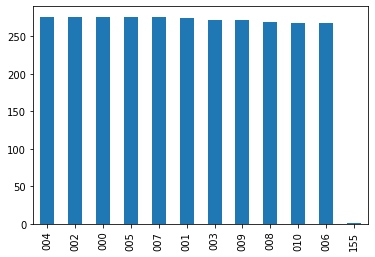

In [ ]:
df['category'].value_counts().plot.bar()

In [ ]:
# Drop the class with less data
df.drop(df[df['category'] == '155'].index, inplace = True) 

In [ ]:
df['category'].value_counts()

004    276
002    276
000    276
005    275
007    275
001    274
003    272
009    271
008    269
010    268
006    267
Name: category, dtype: int64

Randomly visualizing all image datapoints of one of the class

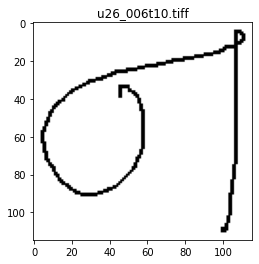

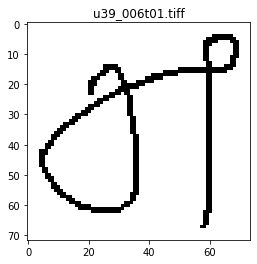

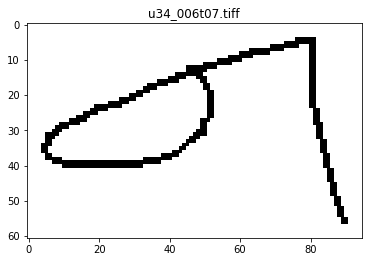

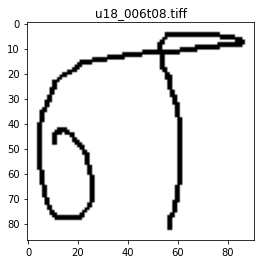

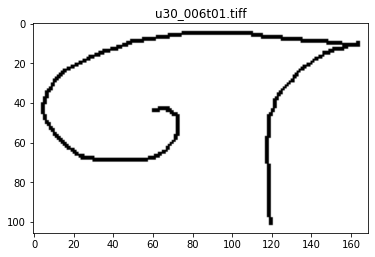

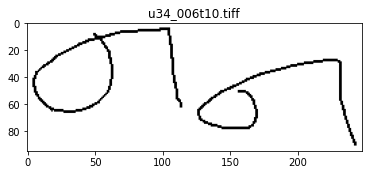

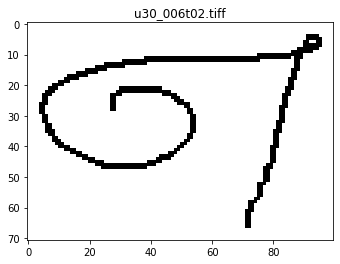

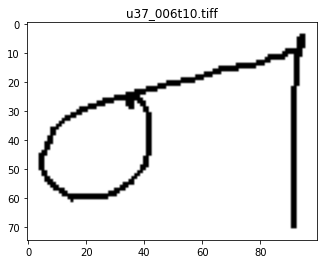

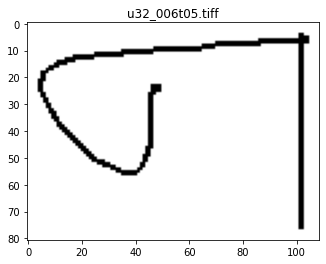

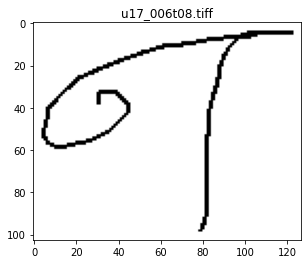

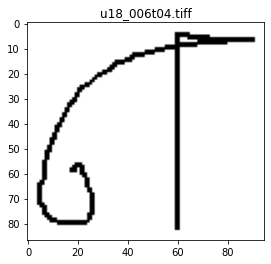

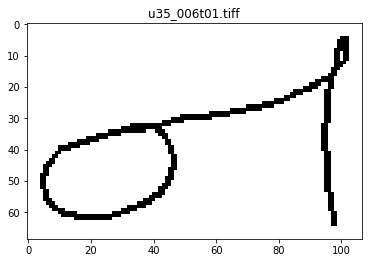

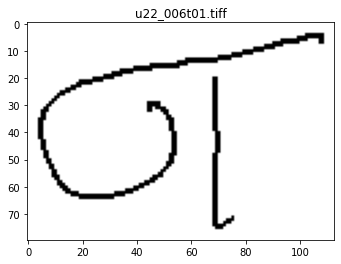

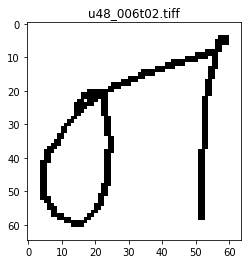

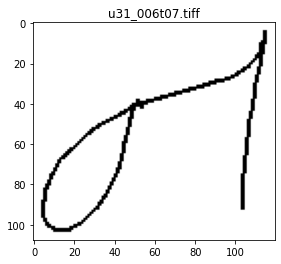

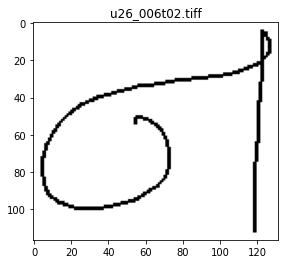

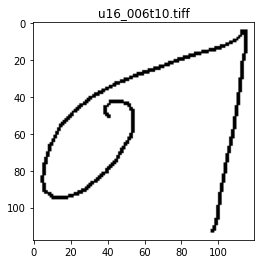

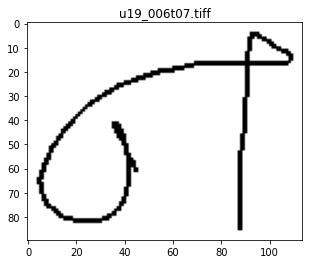

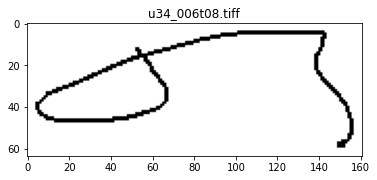

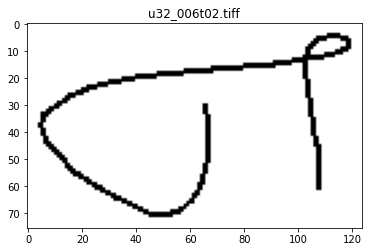

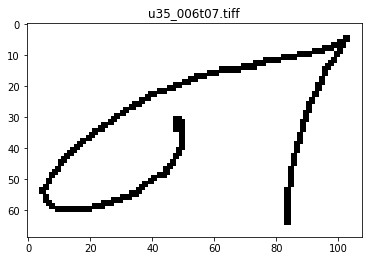

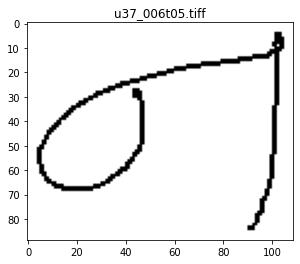

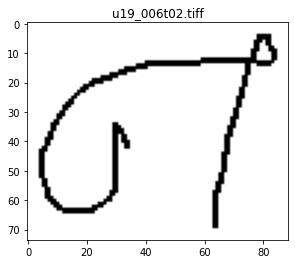

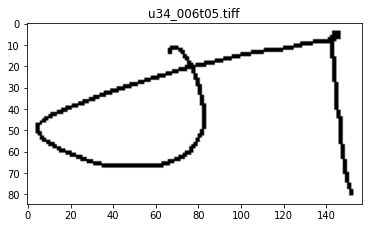

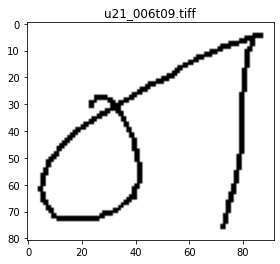

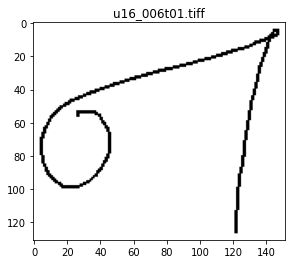

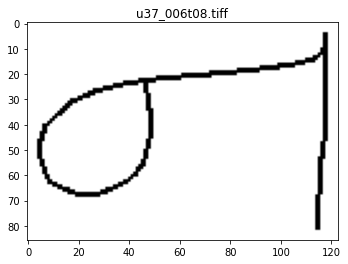

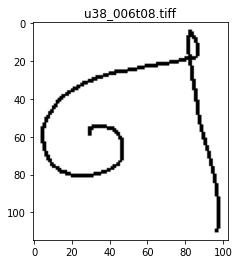

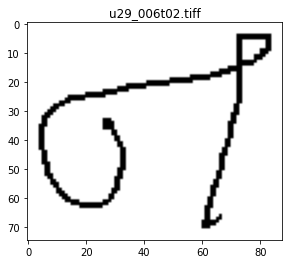

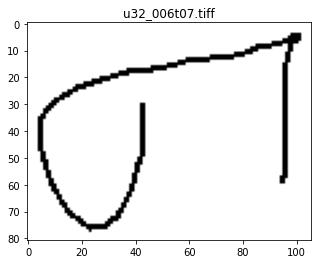

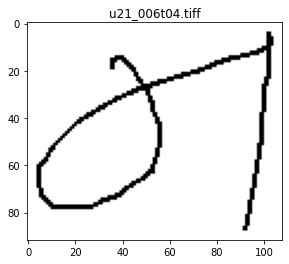

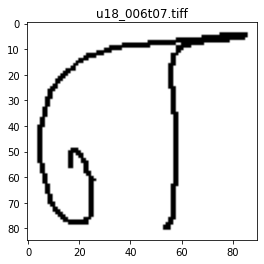

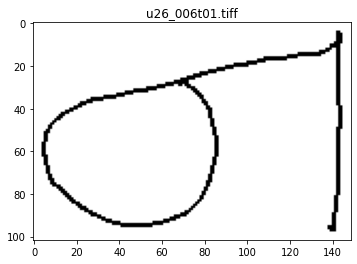

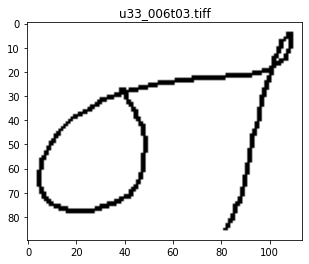

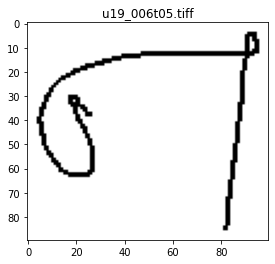

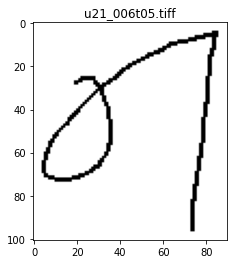

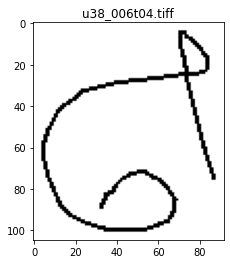

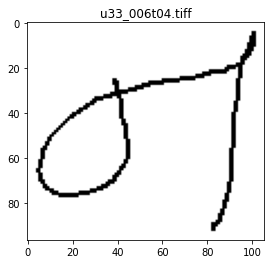

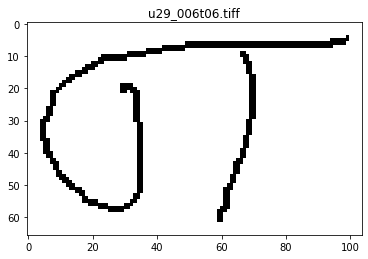

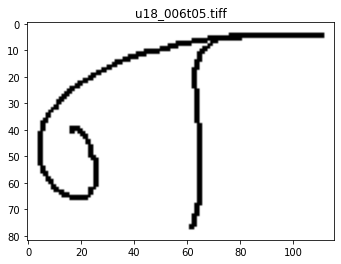

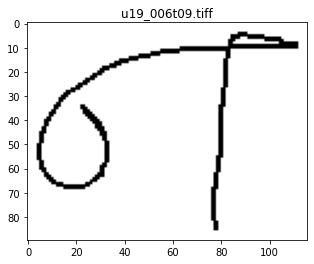

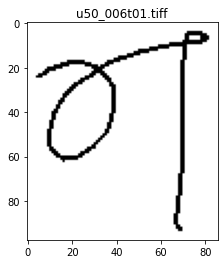

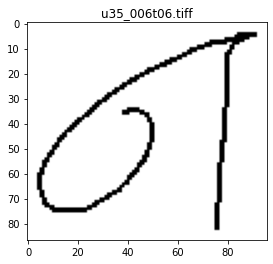

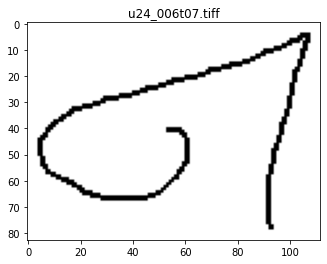

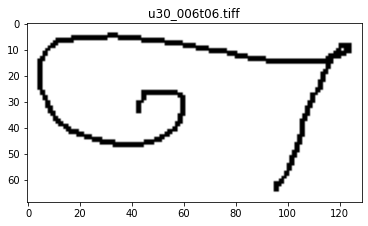

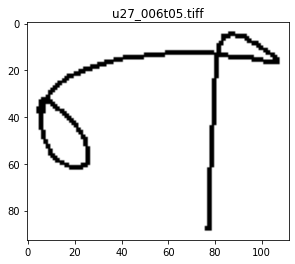

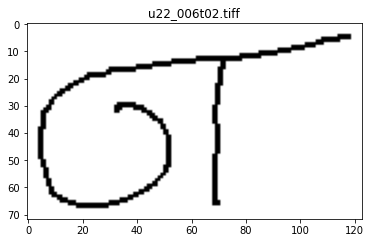

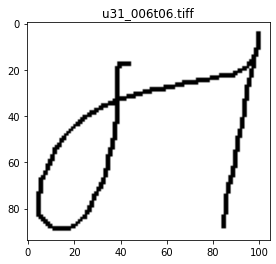

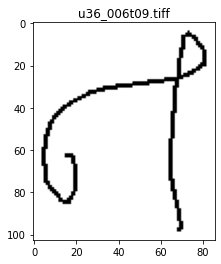

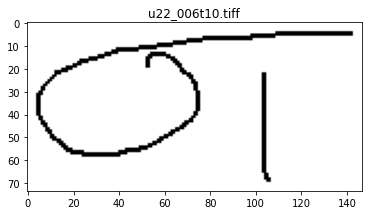

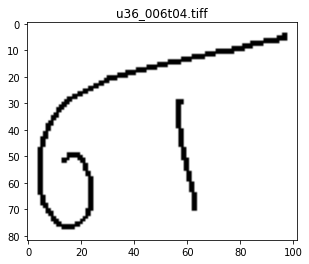

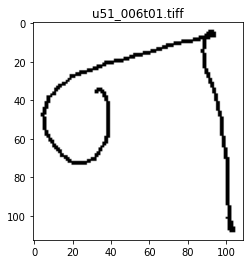

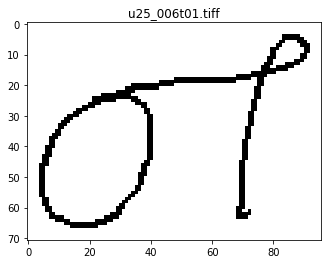

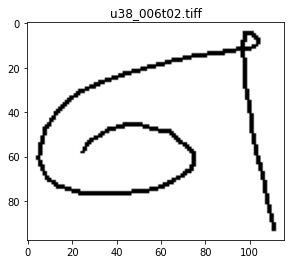

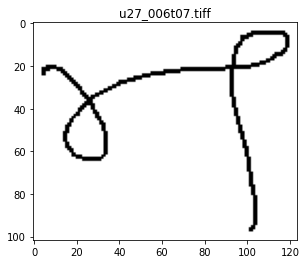

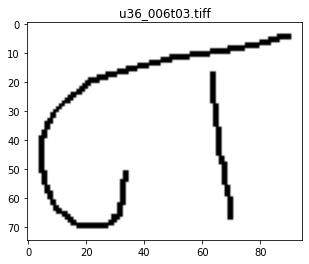

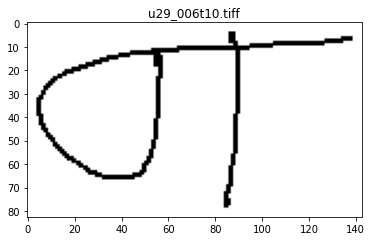

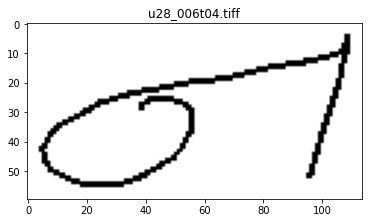

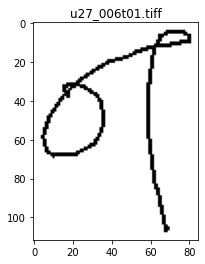

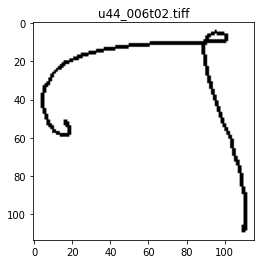

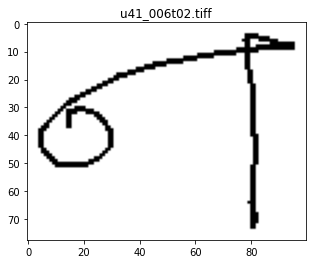

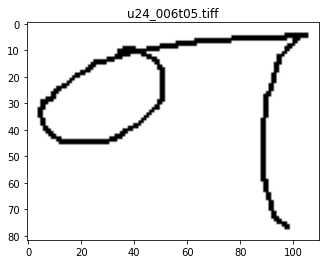

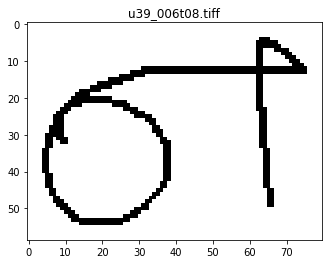

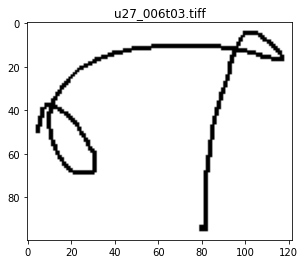

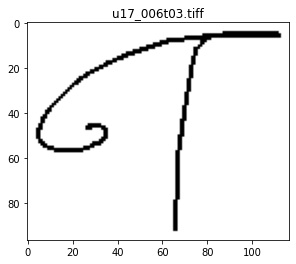

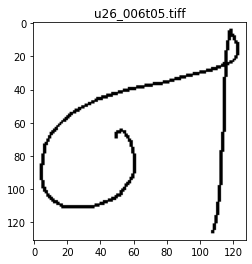

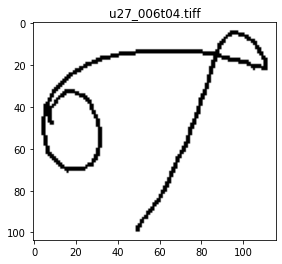

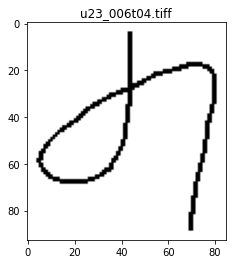

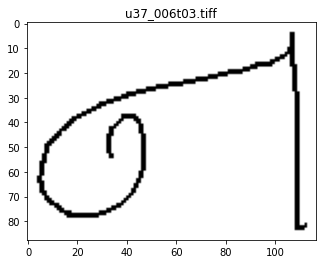

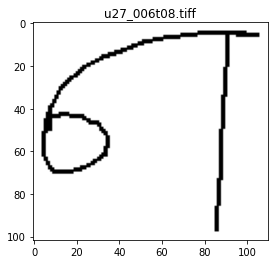

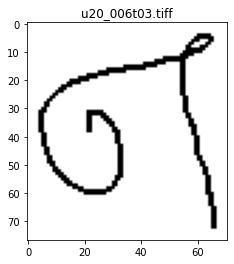

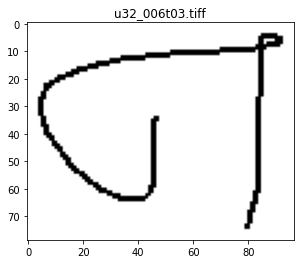

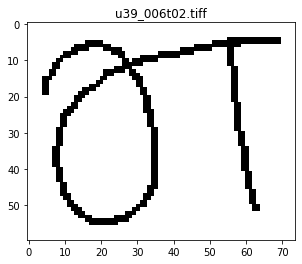

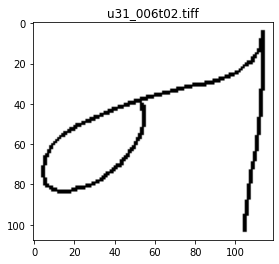

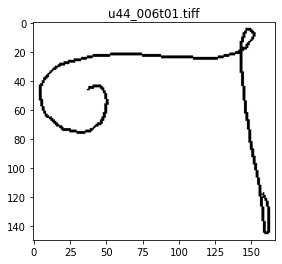

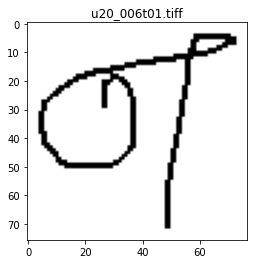

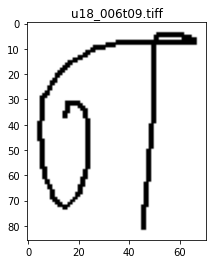

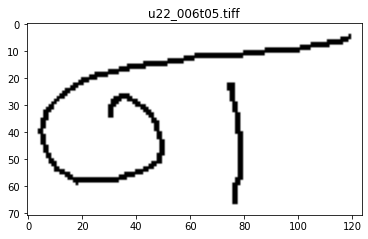

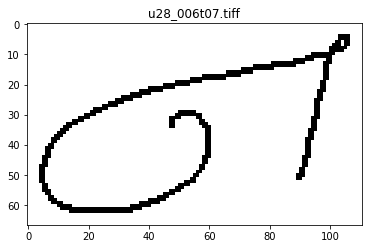

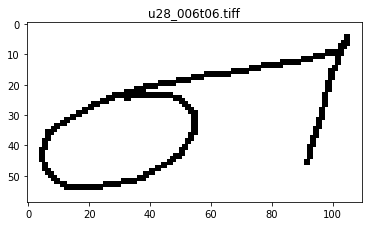

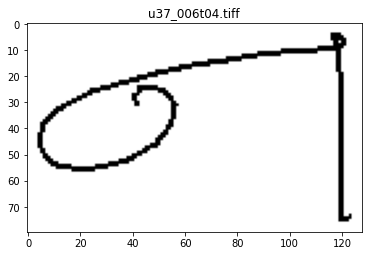

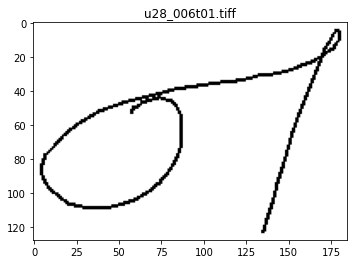

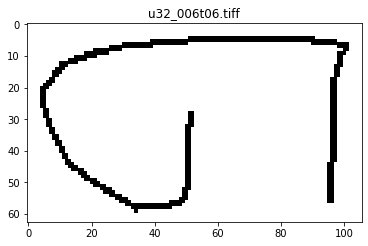

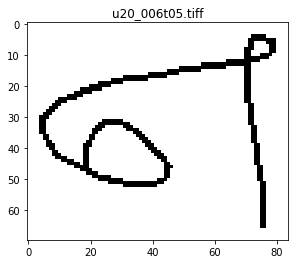

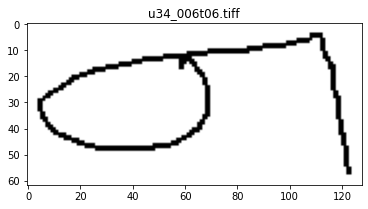

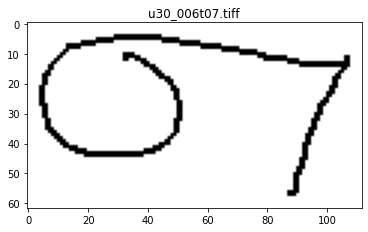

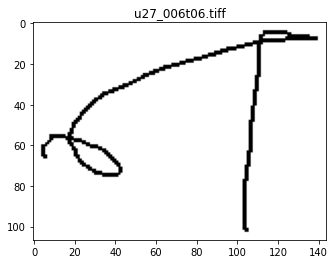

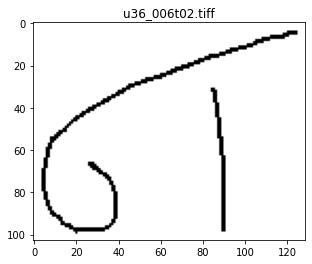

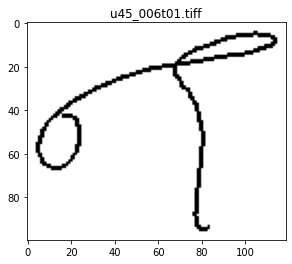

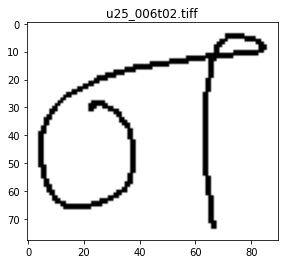

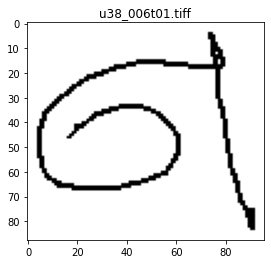

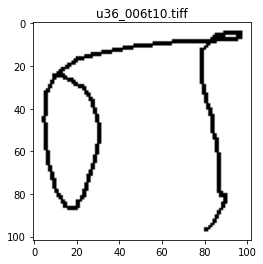

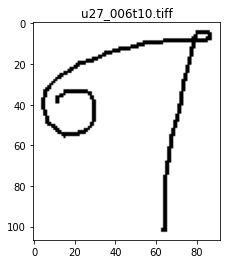

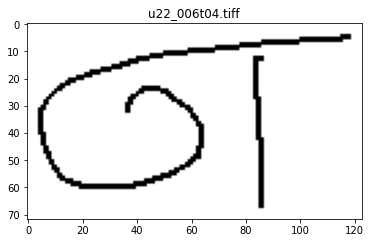

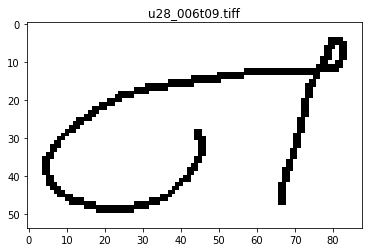

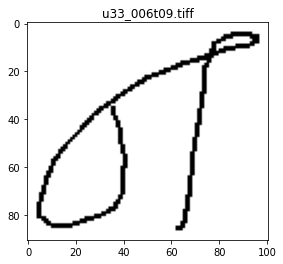

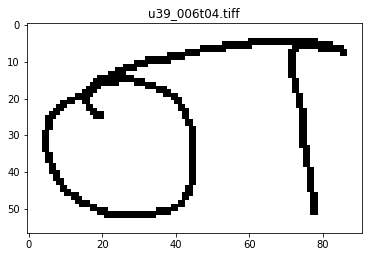

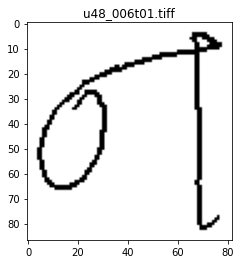

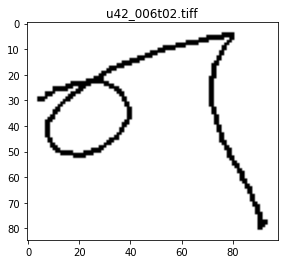

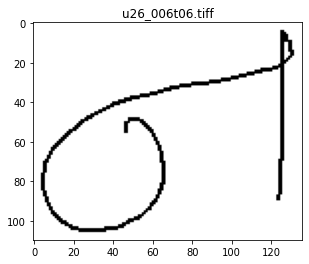

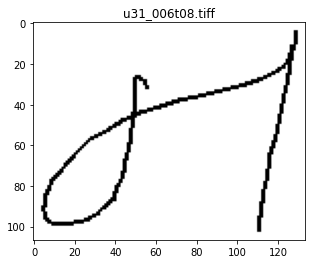

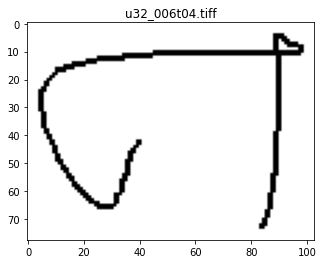

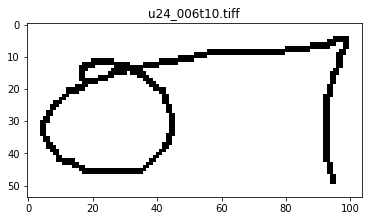

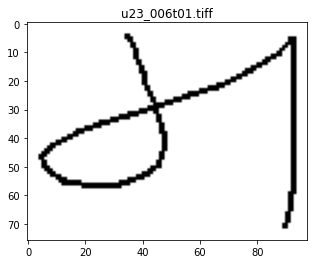

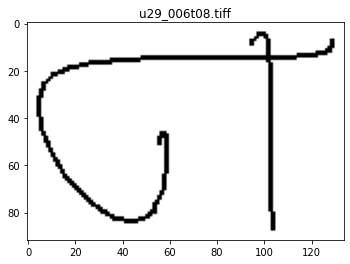

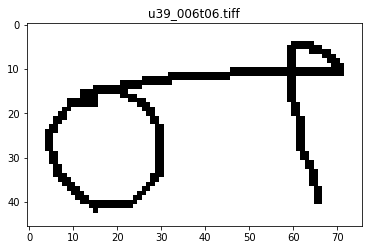

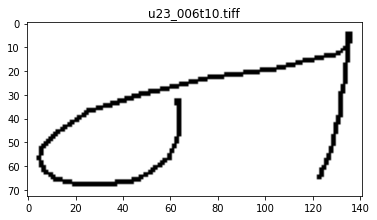

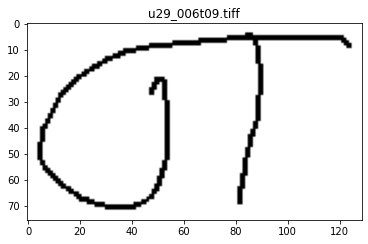

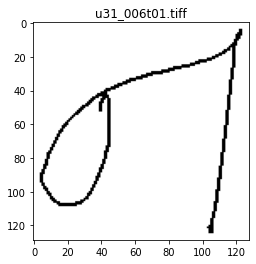

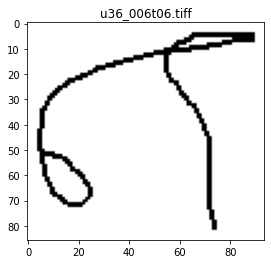

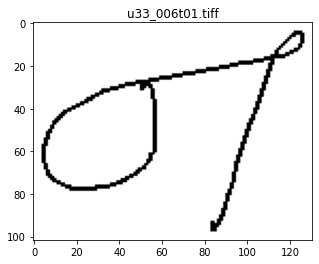

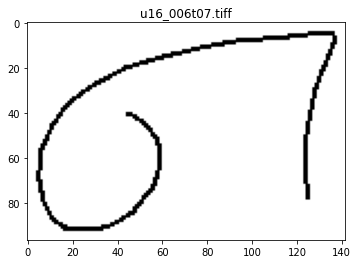

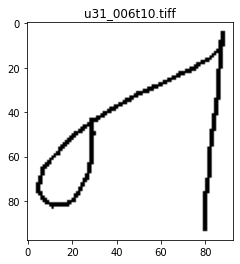

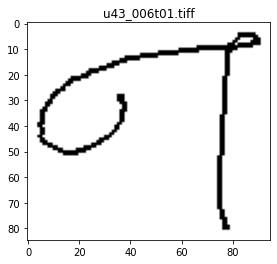

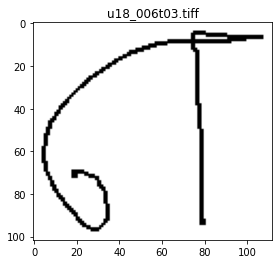

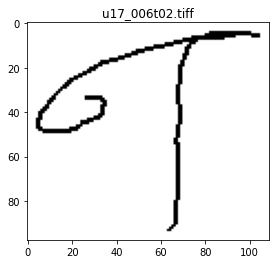

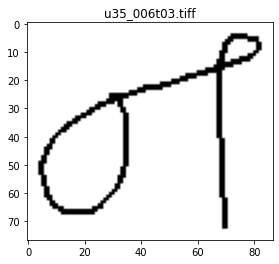

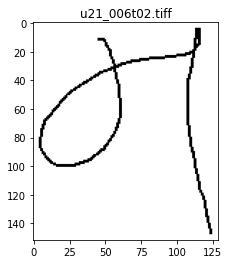

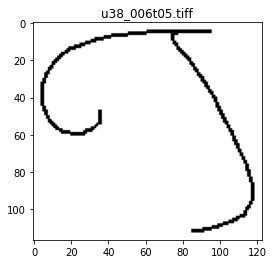

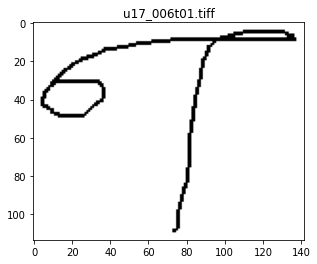

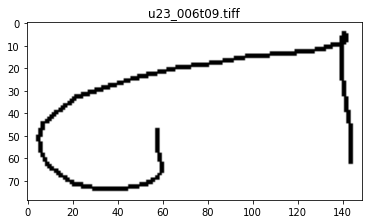

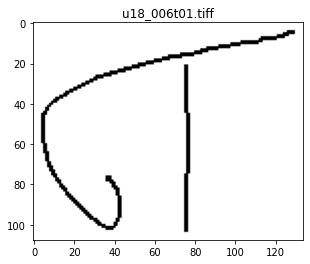

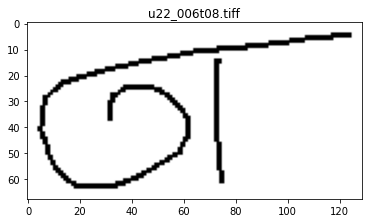

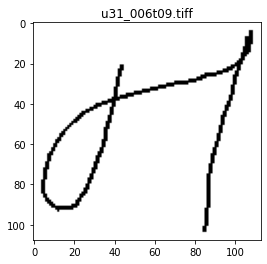

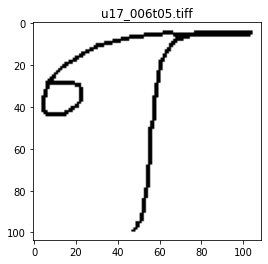

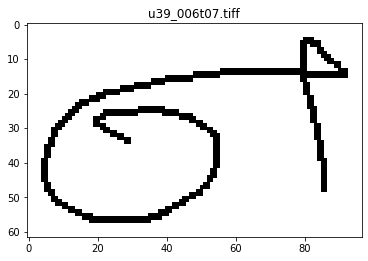

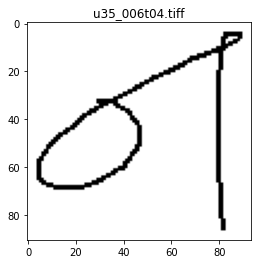

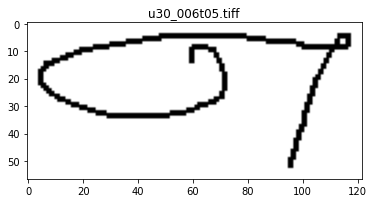

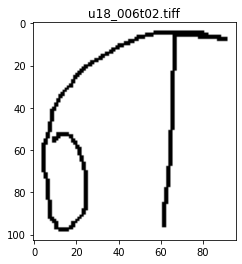

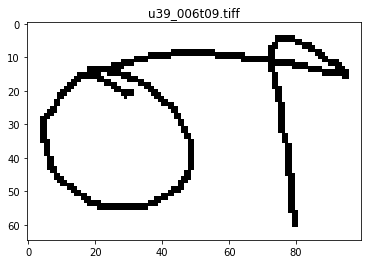

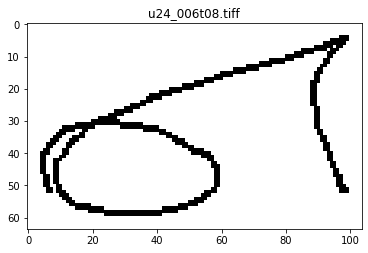

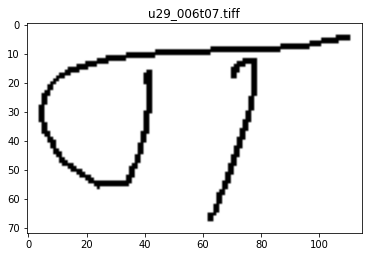

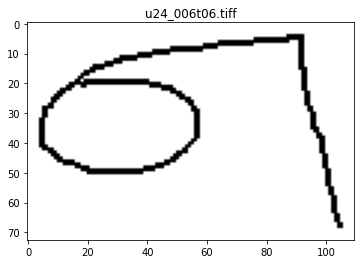

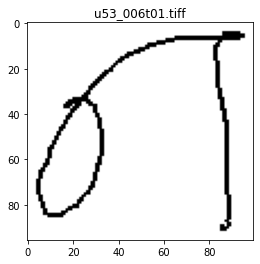

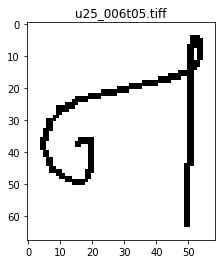

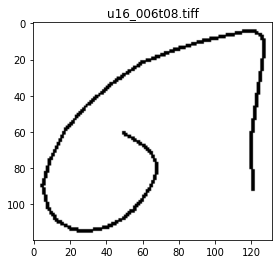

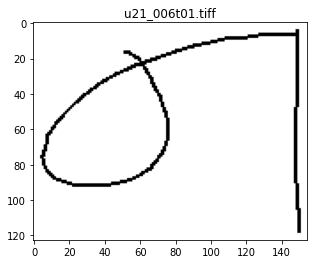

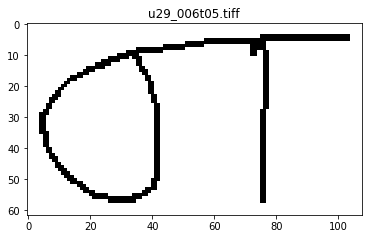

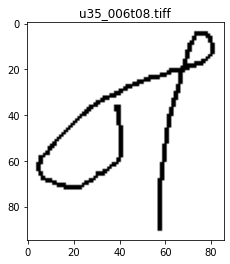

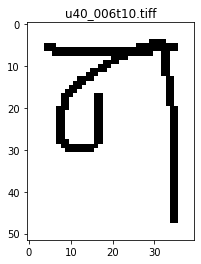

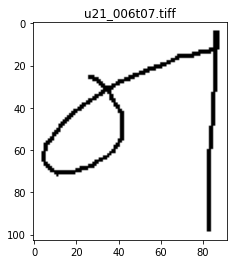

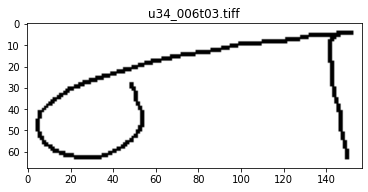

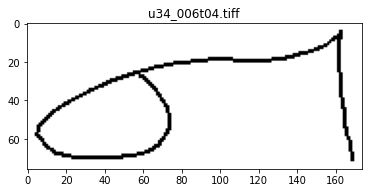

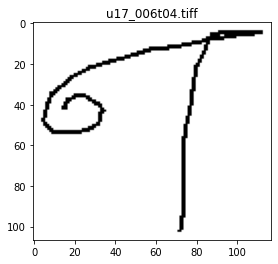

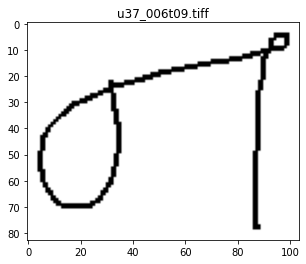

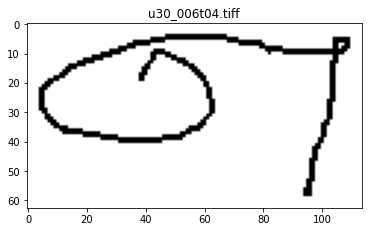

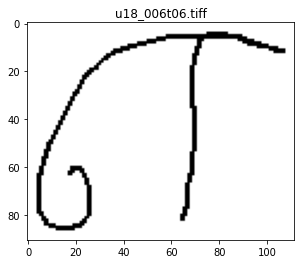

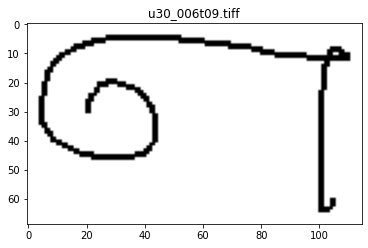

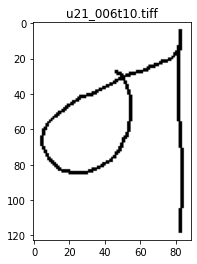

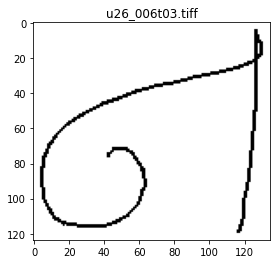

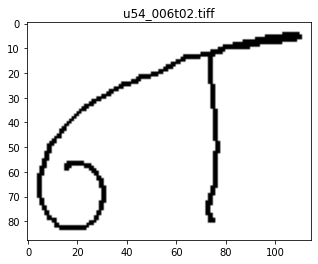

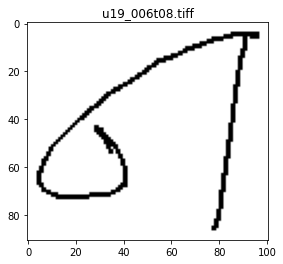

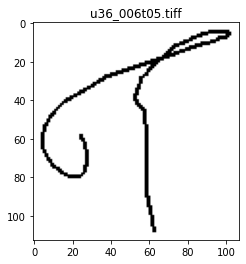

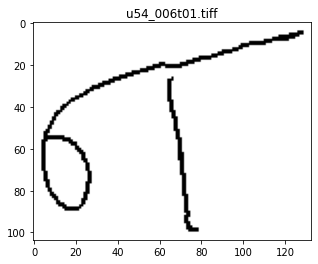

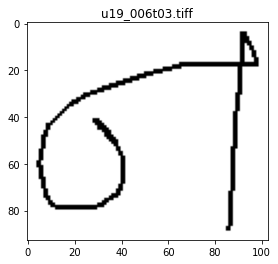

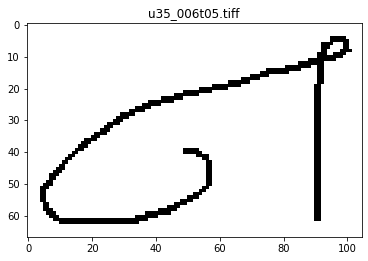

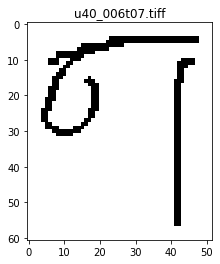

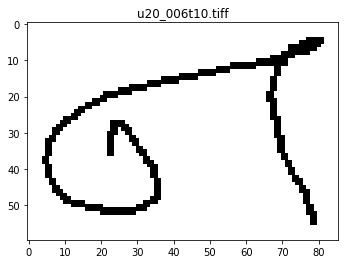

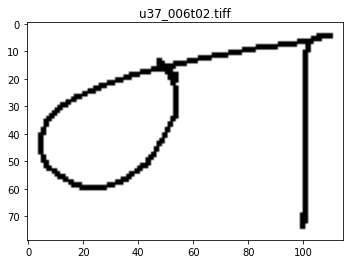

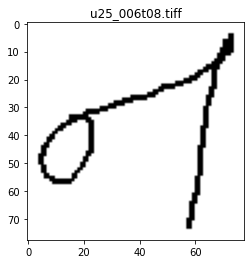

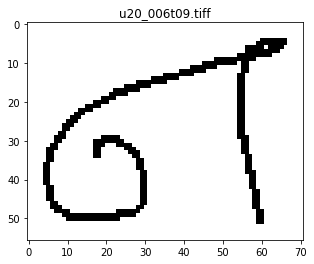

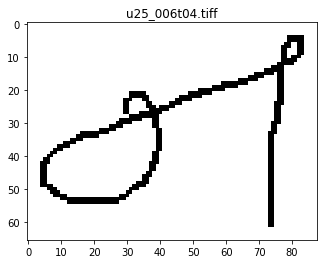

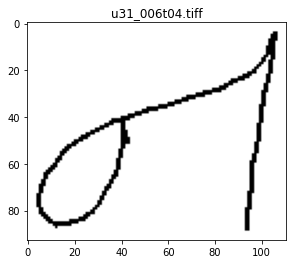

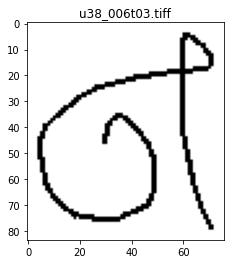

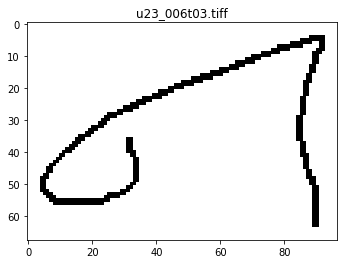

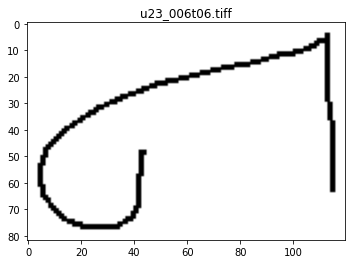

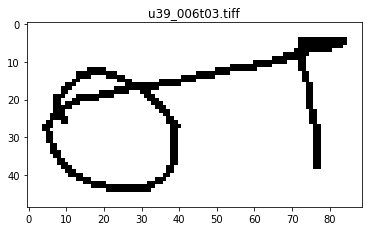

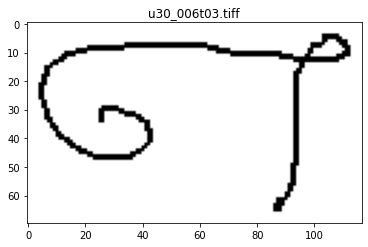

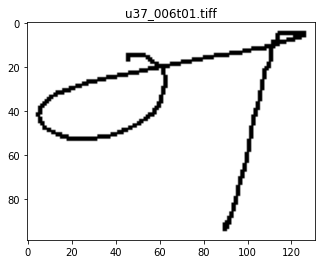

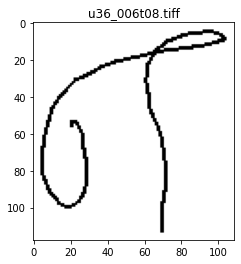

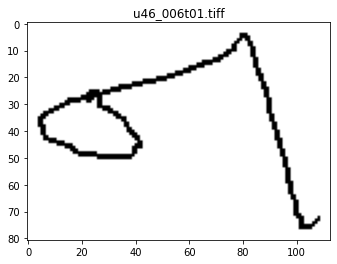

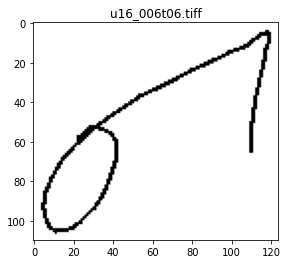

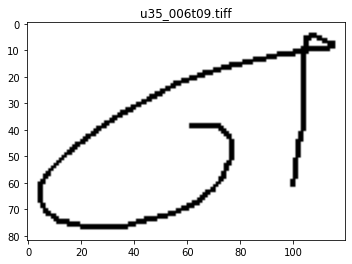

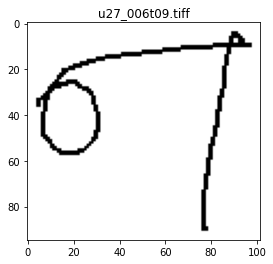

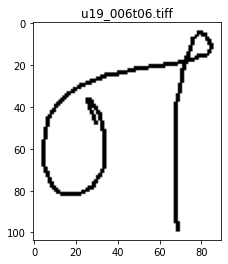

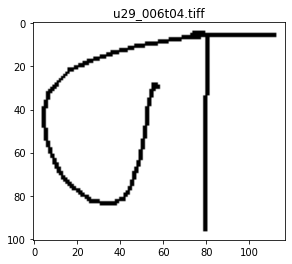

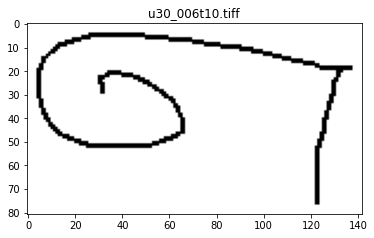

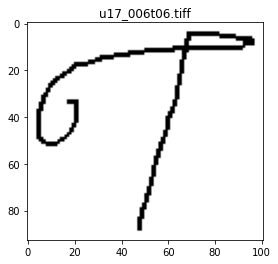

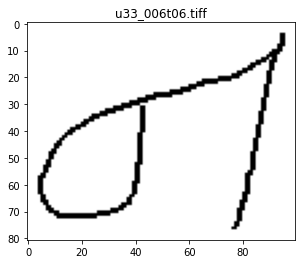

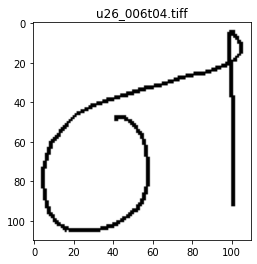

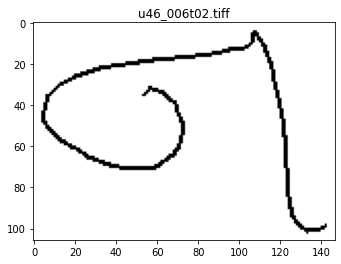

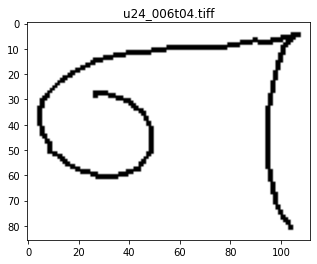

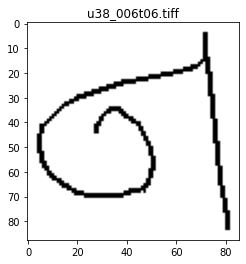

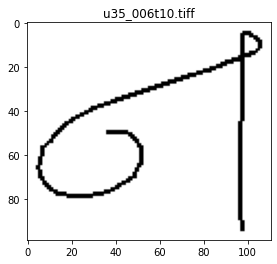

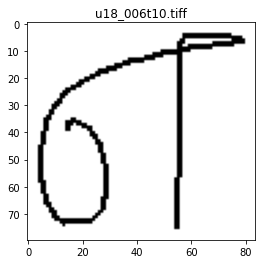

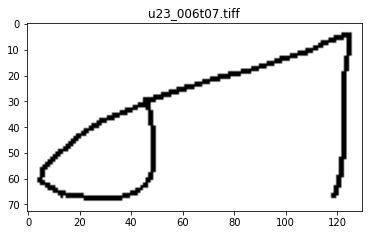

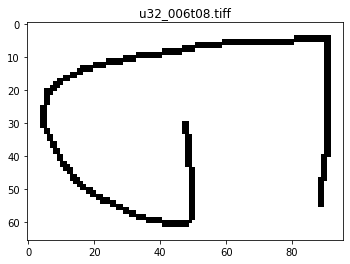

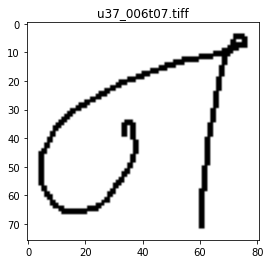

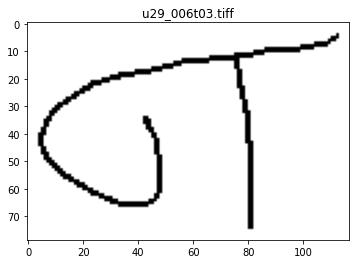

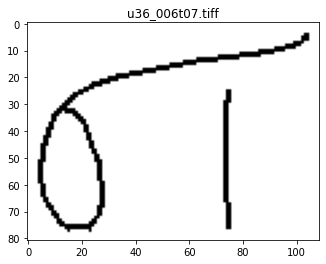

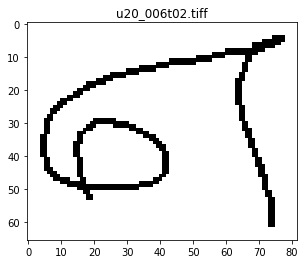

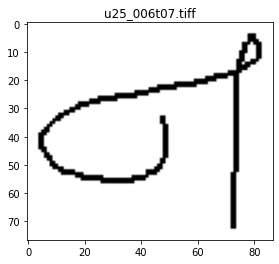

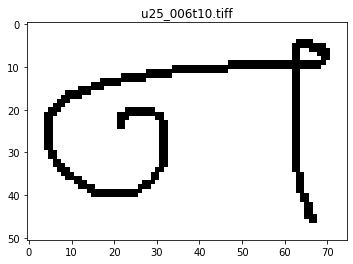

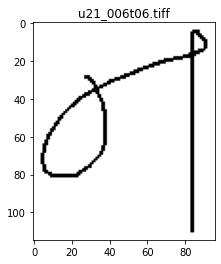

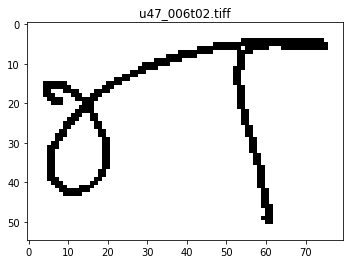

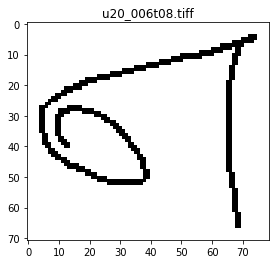

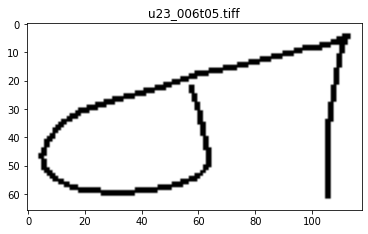

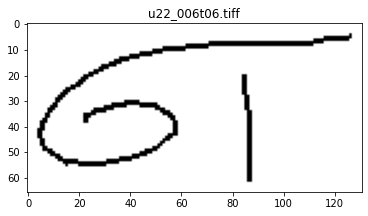

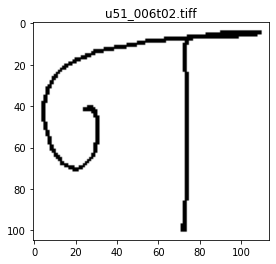

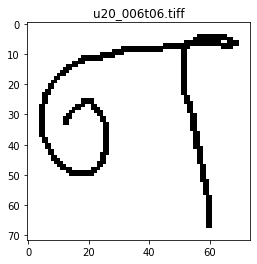

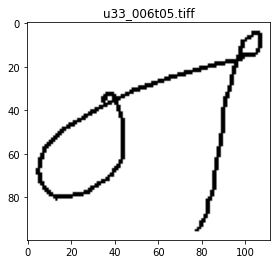

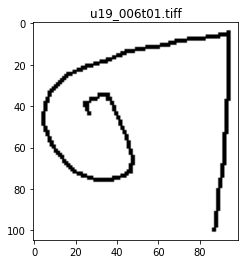

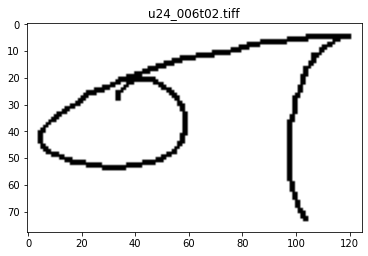

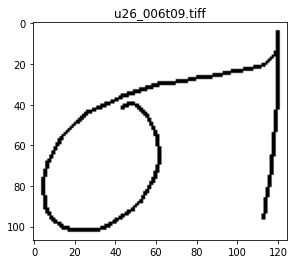

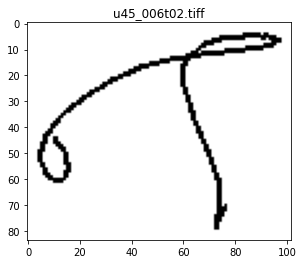

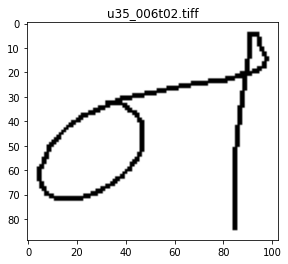

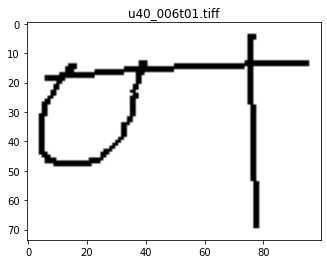

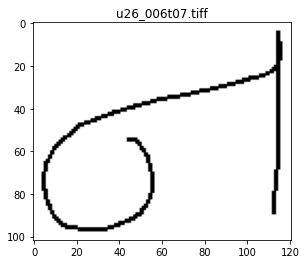

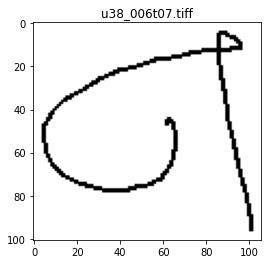

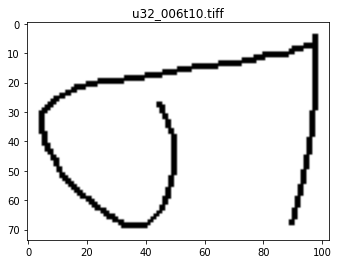

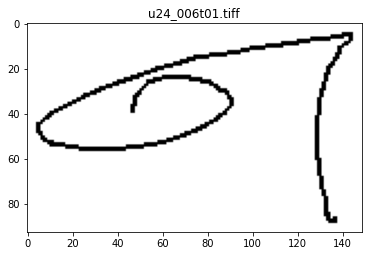

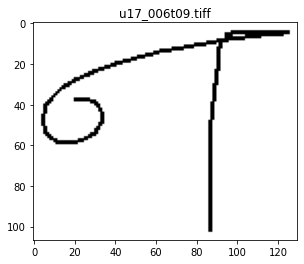

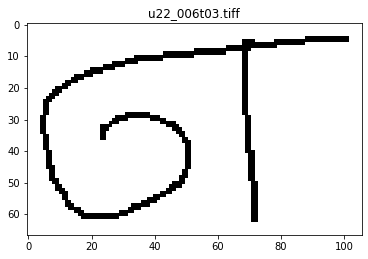

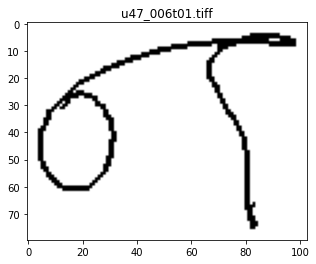

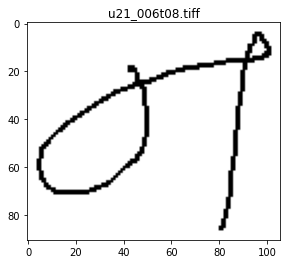

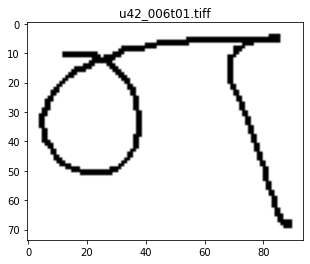

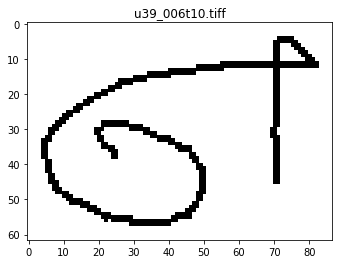

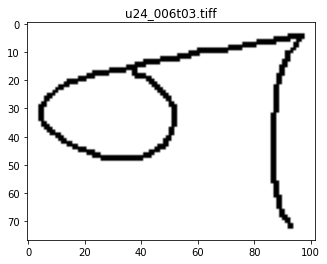

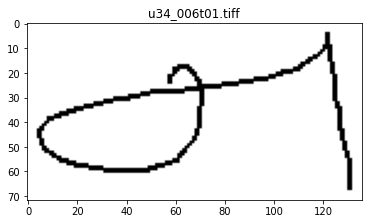

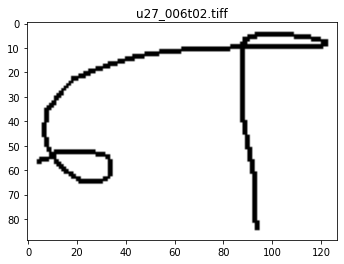

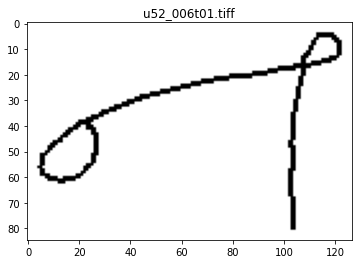

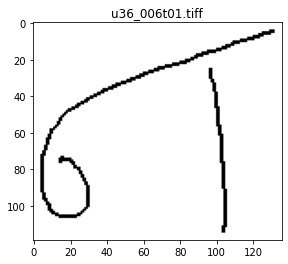

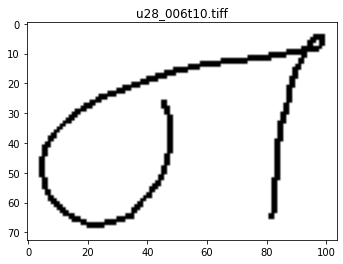

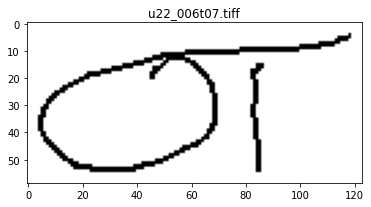

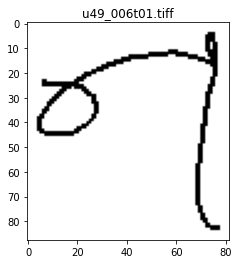

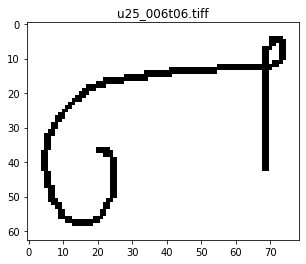

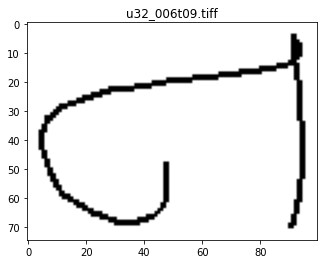

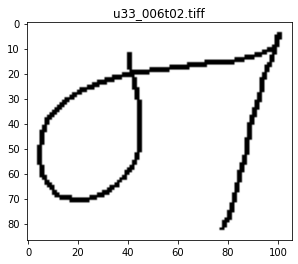

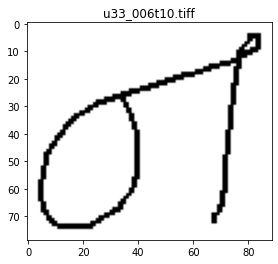

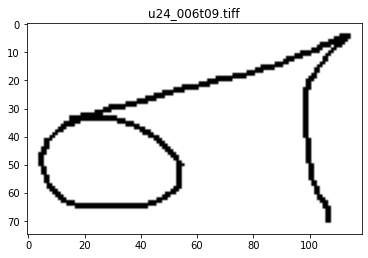

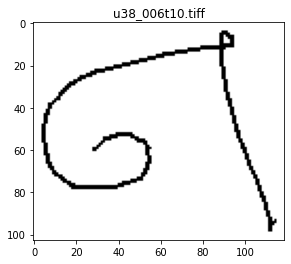

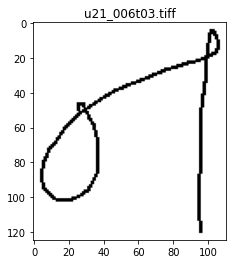

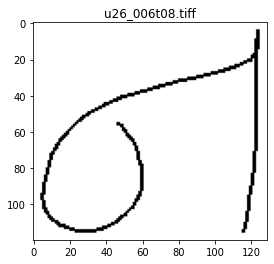

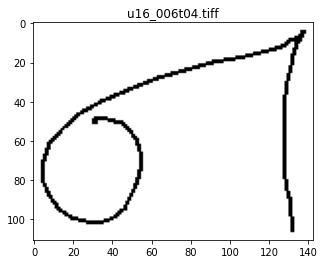

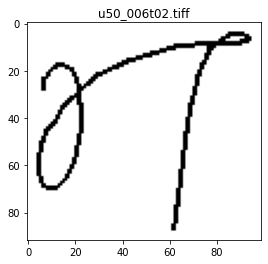

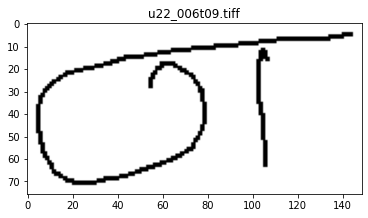

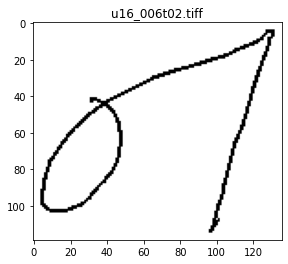

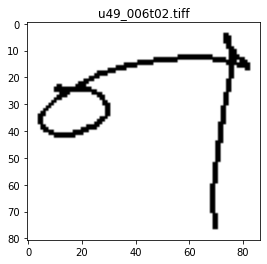

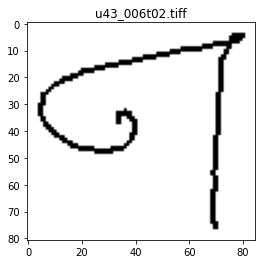

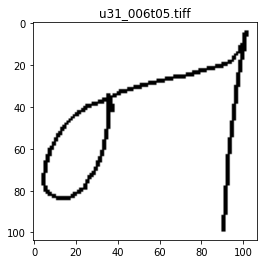

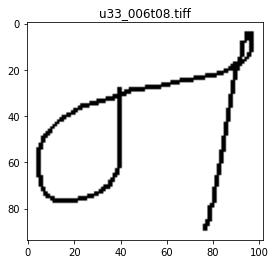

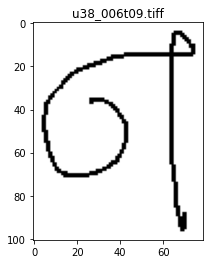

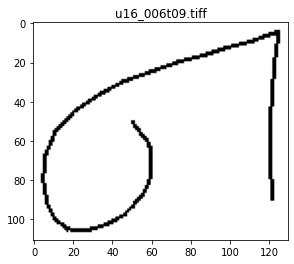

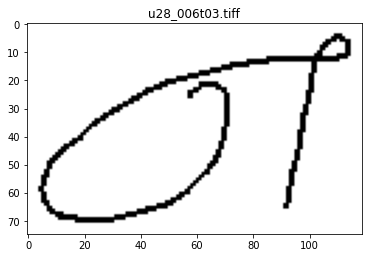

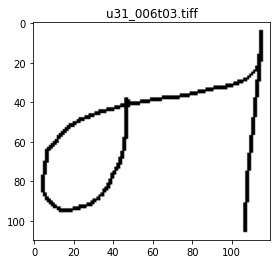

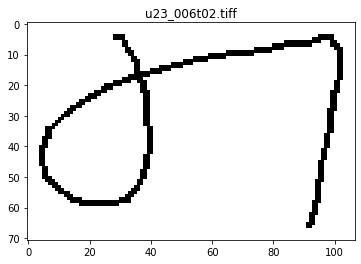

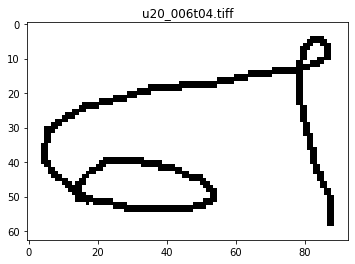

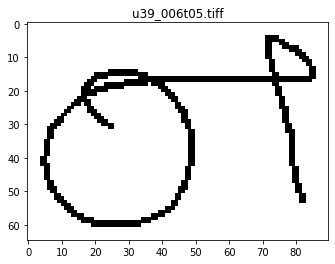

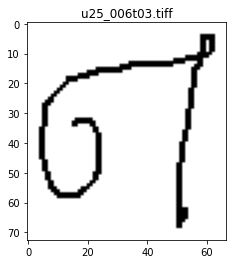

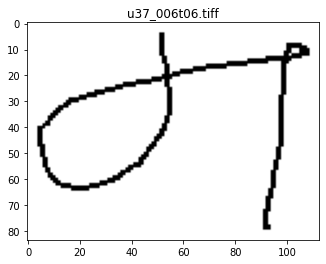

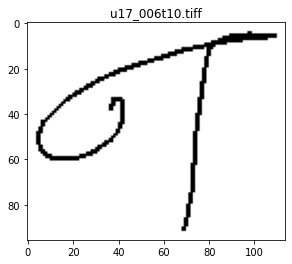

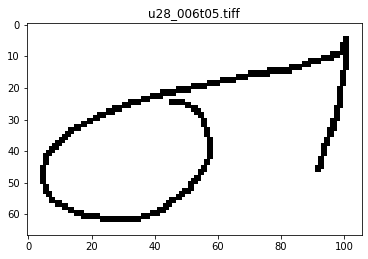

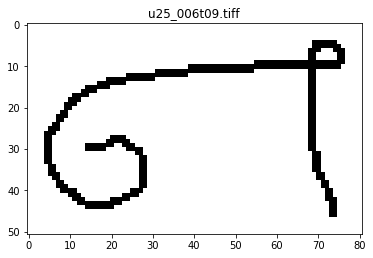

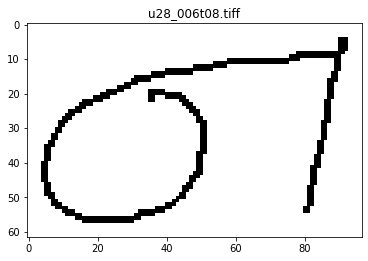

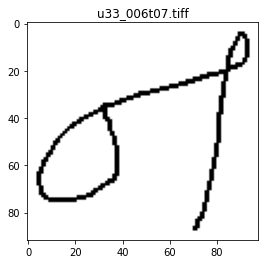

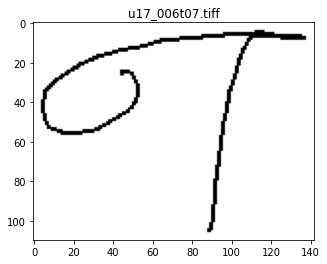

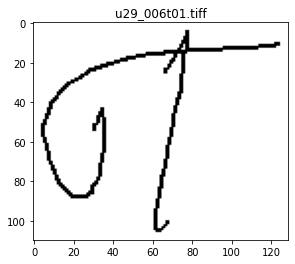

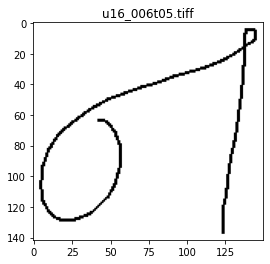

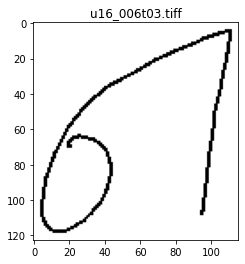

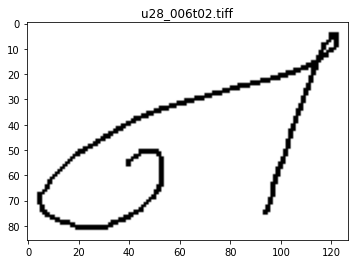

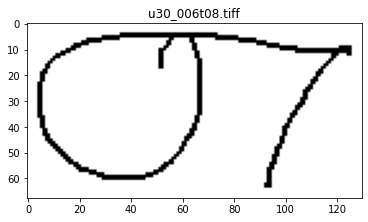

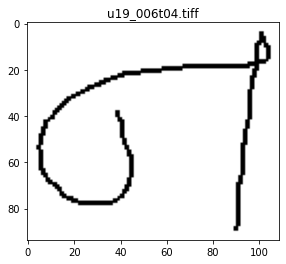

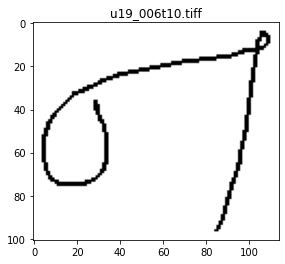

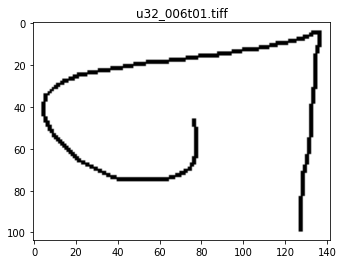

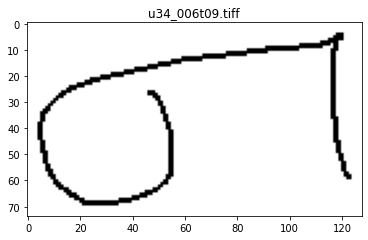

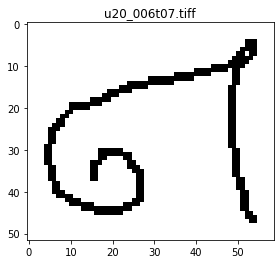

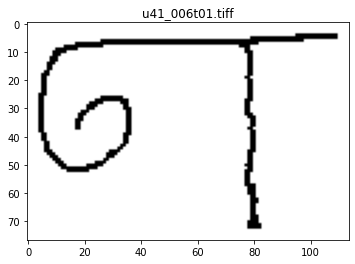

In [ ]:
for filename in df[df['category']=='006']['filename']:
  plt.figure()
  img = mpimg.imread(os.path.join(TRAIN_PATH, filename))
  plt.imshow(img)
  plt.title(filename)
  plt.show()

Few handwritten characters are too ambiguous here...

In [ ]:
# height, width, depth = im_data.shape
height, width, depth = [], [], []
for filename in df['filename']:
  img = mpimg.imread(os.path.join(TRAIN_PATH, filename))
  h, w, d = img.shape
  height.append(h)
  width.append(w)
  depth.append(d)

dim_df = pd.DataFrame({
    'height': height,
    'width': width,
    'depth': depth
})

In [ ]:
dim_df.describe()

height        width   depth
count  2999.000000  2999.000000  2999.0
mean    107.107036   136.556185     4.0
std      27.767347    44.495558     0.0
min      42.000000    40.000000     4.0
25%      87.000000   105.000000     4.0
50%     106.000000   128.000000     4.0
75%     125.000000   161.000000     4.0
max     234.000000   406.000000     4.0

**Splitting the Data into Training and Validation Dataset**

In [ ]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=28) 
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)

Train Dataset Size:  2399
Validation Dataset Size:  600


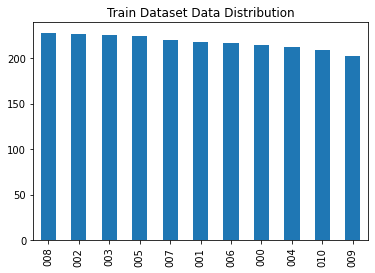

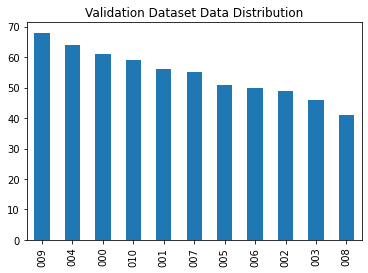

In [ ]:
print('Train Dataset Size: ', len(train_df))
print('Validation Dataset Size: ', len(val_df))


train_df['category'].value_counts().plot.bar()
plt.title('Train Dataset Data Distribution')
plt.show()

plt.figure()

val_df['category'].value_counts().plot.bar()
plt.title('Validation Dataset Data Distribution')
plt.show()

**Create Training and validation Image Data Generators**

In [ ]:
batch_size = 5
epoch = 50

train_count = train_df.shape[0]
val_count = val_df.shape[0]

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    # rotation_range = 10,
    # width_shift_range = 0.2,
    # height_shift_range = 0.2,
    # shear_range = 0.2,
    horizontal_flip=False,
    fill_mode='nearest', 
    )

train_gen = train_datagen.flow_from_dataframe(
    train_df,
    directory = TRAIN_PATH,
    x_col = 'filename',
    y_col = 'category',
    class_mode = 'categorical',
    target_size = IMAGE_SHAPE[:2],
    batch_size = batch_size,
    color_mode='grayscale'
)

val_gen = train_datagen.flow_from_dataframe(
    val_df,
    directory = TRAIN_PATH,
    x_col = 'filename',
    y_col = 'category',
    class_mode = 'categorical',
    target_size = IMAGE_SHAPE[:2],
    batch_size = batch_size,
    color_mode='grayscale'
) 

Found 2399 validated image filenames belonging to 11 classes.
Found 600 validated image filenames belonging to 11 classes.


**CNN Model**

**Build a Deep Learning model with CNN**

In [ ]:
def build_model():
  model = models.Sequential()

  model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=IMAGE_SHAPE))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPool2D(pool_size=(2, 2)))
  model.add(layers.Dropout(0.2))

  model.add(layers.Conv2D(32, (5, 5), activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPool2D(pool_size=(2, 2)))
  model.add(layers.Dropout(0.2))

  model.add(layers.Conv2D(32, (5, 5), activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPool2D(pool_size=(2, 2)))
  model.add(layers.Dropout(0.2))

  model.add(layers.Conv2D(64, (6, 6), activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPool2D(pool_size=(2, 2)))
  model.add(layers.Dropout(0.2))
  
  model.add(layers.Flatten())
  model.add(layers.Dense(256, activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(11, activation='softmax'))

  model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
  return model

model = build_model()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 116, 116, 32)      832       
                                                                 
 batch_normalization (BatchN  (None, 116, 116, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 58, 58, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 58, 58, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 54, 54, 32)        25632     
                                                                 
 batch_normalization_1 (Batc  (None, 54, 54, 32)       1

**Create Callbacks**

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

earlystop = EarlyStopping(patience=10)
lrreducuction = ReduceLROnPlateau(monitor='val_loss', factor=0.05, patience=2, verbose=1, min_lr=0.000005)
filepath = "checkpoint.h5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')

callbacks = [earlystop, lrreducuction, checkpoint]

**Model Training**

In [ ]:
history = model.fit(
    train_gen,
    epochs=epoch,
    steps_per_epoch = train_count // batch_size,
    validation_data = val_gen,
    validation_steps = val_count // batch_size,
    callbacks = callbacks
)

Epoch 1/50
479/479 [==============================] - ETA: 0s - loss: 0.1232 - accuracy: 0.9595
Epoch 1: loss did not improve from 0.11882
479/479 [==============================] - 111s 232ms/step - loss: 0.1232 - accuracy: 0.9595 - val_loss: 0.1576 - val_accuracy: 0.9617 - lr: 5.0000e-06
Epoch 2/50
479/479 [==============================] - ETA: 0s - loss: 0.1461 - accuracy: 0.9570
Epoch 2: loss did not improve from 0.11882
479/479 [==============================] - 103s 216ms/step - loss: 0.1461 - accuracy: 0.9570 - val_loss: 0.1594 - val_accuracy: 0.9617 - lr: 5.0000e-06
Epoch 3/50
479/479 [==============================] - ETA: 0s - loss: 0.1033 - accuracy: 0.9716
Epoch 3: loss improved from 0.11882 to 0.10329, saving model to checkpoint.h5
479/479 [==============================] - 102s 214ms/step - loss: 0.1033 - accuracy: 0.9716 - val_loss: 0.1577 - val_accuracy: 0.9617 - lr: 5.0000e-06
Epoch 4/50
479/479 [==============================] - ETA: 0s - loss: 0.1242 - accuracy: 0.9

The model has a validation accuracy of 97.33%

In [ ]:
model.save_weights("tamil_char.h5")

In [ ]:
model.save("tamil_handwritten_char.h5")

**Visualizing Validation vs Training Accuracy and Loss**

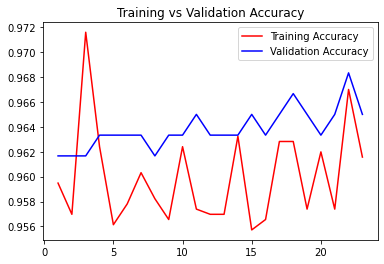

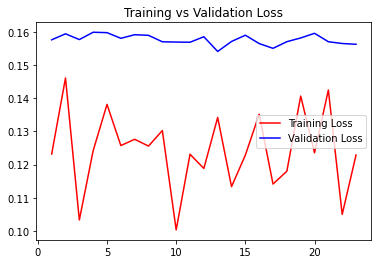

In [ ]:
epoch_xaxis = range(1, len(history.history['accuracy'])+1)

plt.plot(epoch_xaxis, history.history['accuracy'], 'r', label='Training Accuracy')
plt.plot(epoch_xaxis, history.history['val_accuracy'], 'b', label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

plt.figure()

plt.plot(epoch_xaxis, history.history['loss'], 'r', label='Training Loss')
plt.plot(epoch_xaxis, history.history['val_loss'], 'b', label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

The model didnt overfit, and has reached covergence.

-> Validation Accuracy: 97.33%

-> Validation loss: 0.1091

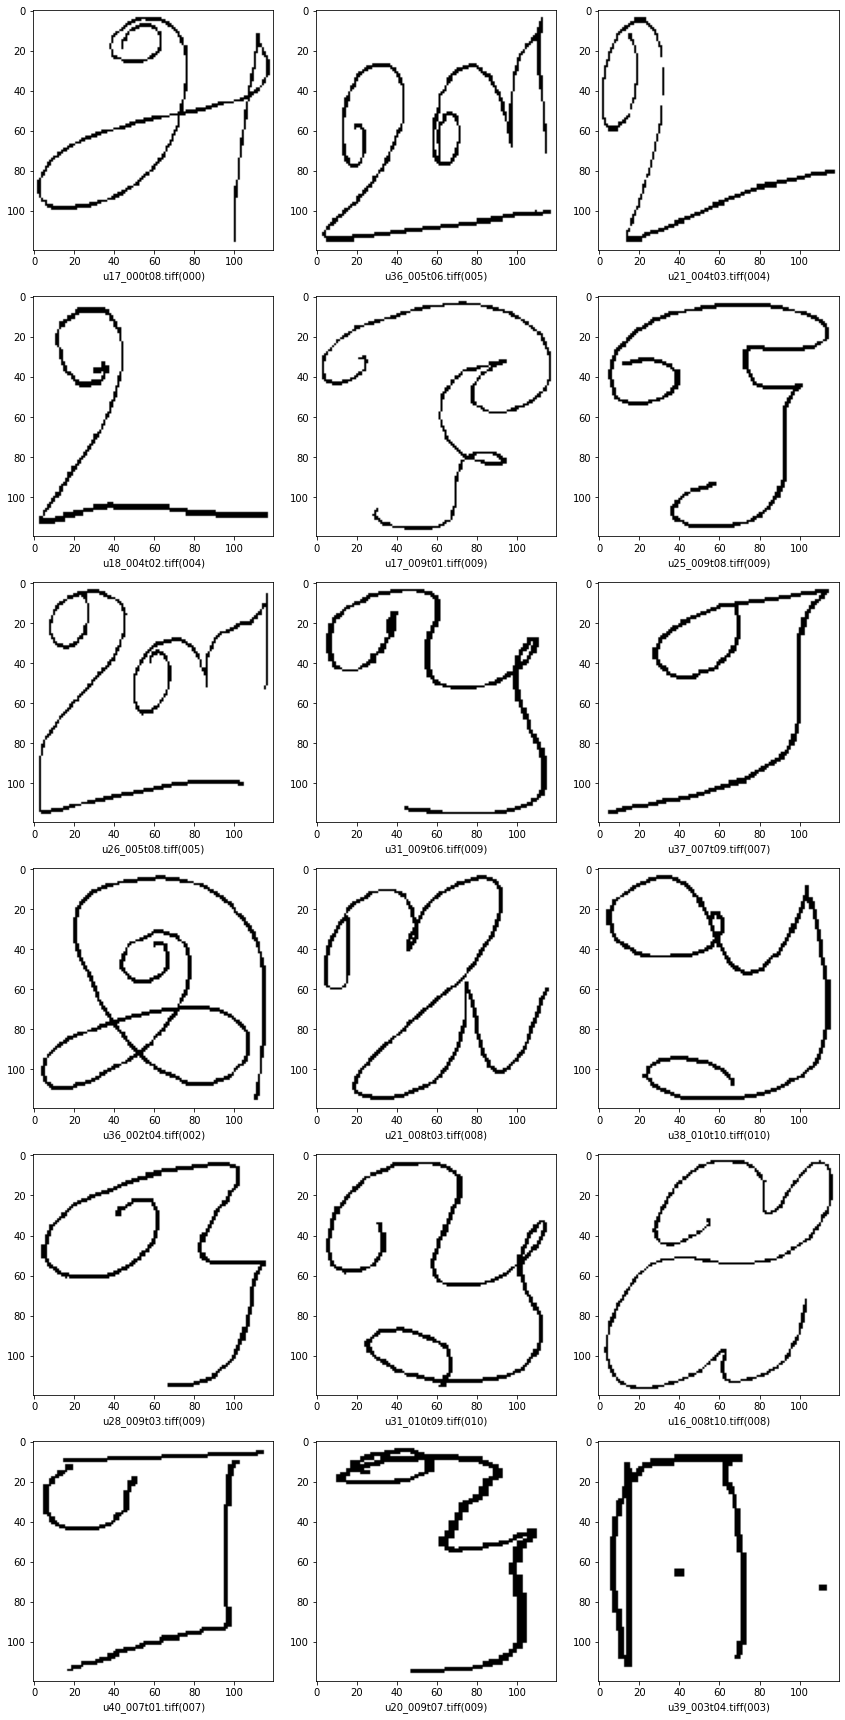

In [ ]:
sample_test = val_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img(os.path.join(TRAIN_PATH,filename), target_size=IMAGE_SHAPE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

In [ ]:
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    print(filename + ' ==> ' + MAP[category])

u17_000t08.tiff ==> அ
u36_005t06.tiff ==> ஊ
u21_004t03.tiff ==> உ
u18_004t02.tiff ==> உ
u17_009t01.tiff ==> ஒ
u25_009t08.tiff ==> ஒ
u26_005t08.tiff ==> ஊ
u31_009t06.tiff ==> ஒ
u37_007t09.tiff ==> ஏ
u36_002t04.tiff ==> இ
u21_008t03.tiff ==> ஐ
u38_010t10.tiff ==> ஓ
u28_009t03.tiff ==> ஒ
u31_010t09.tiff ==> ஓ
u16_008t10.tiff ==> ஐ
u40_007t01.tiff ==> ஏ
u20_009t07.tiff ==> ஒ
u39_003t04.tiff ==> ஈ
